***The Data Analysis of WEB Scraped Data from the Website***
https://results.eci.gov.in/PcResultGenJune2024/index.htm

The data is web scraped using the libraries named BeautifulSoup and requests

Hope you enjoy reading the analysis❤️


**To Import nessary libraries**

Upload the dataset


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('election_results_2024.csv')


In [3]:
# Display basic information
print(df.info())

# Display basic statistics
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Constituency        543 non-null    object
 1   Const. No.          543 non-null    int64 
 2   Leading Candidate   543 non-null    object
 3   Leading Party       543 non-null    object
 4   Trailing Candidate  542 non-null    object
 5   Trailing Party      542 non-null    object
 6   Margin              543 non-null    object
 7   Status              543 non-null    object
dtypes: int64(1), object(7)
memory usage: 34.1+ KB
None
       Const. No.
count  543.000000
mean    18.178637
std     16.427840
min      1.000000
25%      6.000000
50%     14.000000
75%     25.000000
max     80.000000


In [6]:
total_constituencies = df['Const. No.'].nunique()
print(f"Total Number of Constituencies: {total_constituencies}")


Total Number of Constituencies: 80


In [7]:
total_candidates = df['Leading Candidate'].nunique() + df['Trailing Candidate'].nunique()
print(f"Total Number of Candidates: {total_candidates}")



Total Number of Candidates: 1084


In [9]:
leading_party_counts = df['Leading Party'].value_counts()
print(f"Party with Most Leading Candidates: {leading_party_counts.idxmax()} ({leading_party_counts.max()} candidates)")


Party with Most Leading Candidates: Bharatiya Janata Party (240 candidates)


Which party Candidates have landed in the trailing party


In [10]:
trailing_party_counts = df['Trailing Party'].value_counts()
print(f"Party with Most Trailing Candidates: {trailing_party_counts.idxmax()} ({trailing_party_counts.max()} candidates)")


Party with Most Trailing Candidates: Indian National Congress (167 candidates)


Who won with the largest margin of victory

In [20]:
df['Margin'] = pd.to_numeric(df['Margin'].replace(',', ''), errors='coerce')
largest_margin = df.loc[df['Margin'].idxmax()]
print(f"Largest Margin of Victory: {largest_margin['Margin']} votes by {largest_margin['Leading Candidate']} ({largest_margin['Leading Party']}) in {largest_margin['Constituency']}")

Largest Margin of Victory: 1175092.0 votes by SHANKAR LALWANI (Bharatiya Janata Party) in INDORE


Who won with the largest margin of victory

In [21]:
smallest_margin = df.loc[df['Margin'].idxmin()]
print(f"Smallest Margin of Victory: {smallest_margin['Margin']} votes by {smallest_margin['Leading Candidate']} ({smallest_margin['Leading Party']}) in {smallest_margin['Constituency']}")


Smallest Margin of Victory: 48.0 votes by RAVINDRA DATTARAM WAIKAR (Shiv Sena) in Mumbai North West


In How many Contituencies the election was held in 2024 and Result declared

In [28]:
declared_results = df['Status'].value_counts().get('Result Declared', 0)
print(f"Number of Declared Results: {declared_results}")


Number of Declared Results: 542


In How many Contituencies the election was held in 2024 and Result was not declared

In [30]:
undeclared_results = df['Status'].value_counts().get('Uncontested', 0)
print(f"Number of Undeclared Results: {undeclared_results}")


Number of Undeclared Results: 1


**Which party has the highest average win margin **

In [31]:
average_margin_party = df.groupby('Leading Party')['Margin'].mean().sort_values(ascending=False)
print(average_margin_party)


Leading Party
Voice of the People Party                                   371910.000000
All India Majlis-E-Ittehadul Muslimeen                      338087.000000
Marumalarchi Dravida Munnetra Kazhagam                      313094.000000
Bharat Adivasi Party                                        247054.000000
Jammu & Kashmir National Conference                         235105.000000
Indian Union Muslim League                                  234220.000000
Dravida Munnetra Kazhagam                                   230981.000000
Telugu Desam                                                228807.937500
Janasena Party                                              226335.000000
Asom Gana Parishad                                          222351.000000
Bharatiya Janata Party                                      192809.774059
Communist Party of India (Marxist)                          186559.250000
Janata Dal (Secular)                                        178004.000000
All India Trinamool Cong

<ipython-input-101-091cdc6a310d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Margin', y='Leading Party', data=average_margin_party, palette='coolwarm')


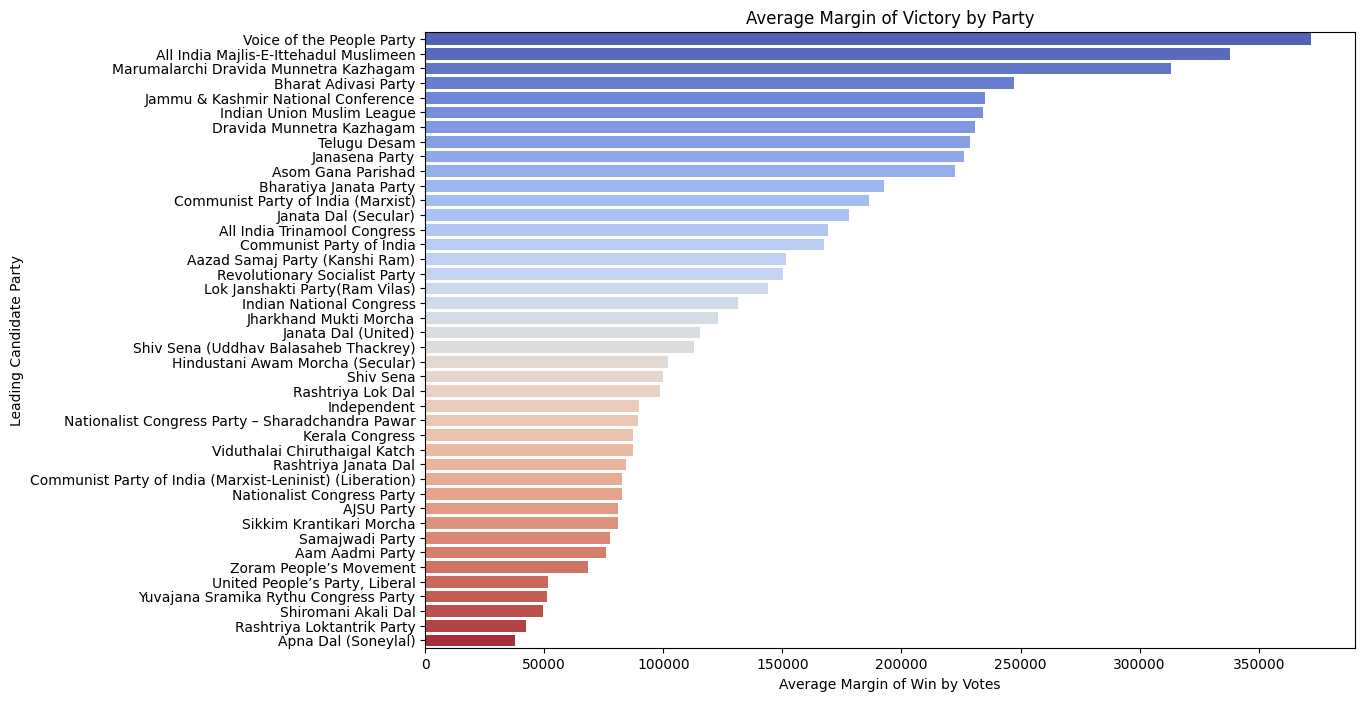

In [101]:
average_margin_party = df.groupby('Leading Party')['Margin'].mean().sort_values(ascending=False).reset_index()

# Plot Bar Chart
plt.figure(figsize=(12, 8))
sns.barplot(x='Margin', y='Leading Party', data=average_margin_party, palette='coolwarm')
plt.title('Average Margin of Victory by Party')
plt.xlabel('Average Margin of Win by Votes')
plt.ylabel('Leading Candidate Party')
plt.show()


Here are the top 5 and bottom 5 margin winners and their constituencies

In [33]:
top_5_constituencies = df.nlargest(5, 'Margin')[['Constituency', 'Margin']]
print(top_5_constituencies)


    Constituency     Margin
221       INDORE  1175092.0
157       Dhubri  1012476.0
525      VIDISHA   821408.0
384      Navsari   773551.0
186  Gandhinagar   744716.0


In [34]:
bottom_5_constituencies = df.nsmallest(5, 'Margin')[['Constituency', 'Margin']]
print(bottom_5_constituencies)


          Constituency  Margin
357  Mumbai North West    48.0
40            Attingal   684.0
236             Jajpur  1587.0
226       JAIPUR RURAL  1615.0
256             KANKER  1884.0


**Distribution of Margin of Victory**

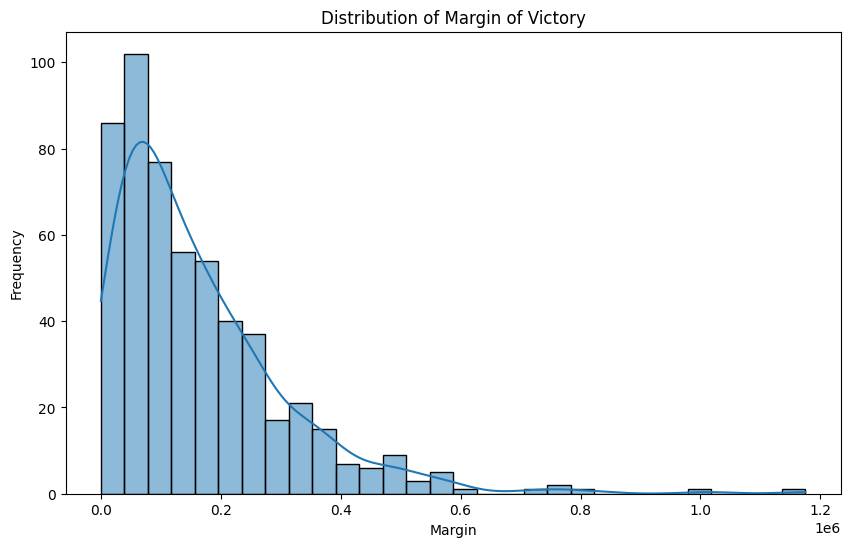

In [35]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Margin'], bins=30, kde=True)
plt.title('Distribution of Margin of Victory')
plt.xlabel('Margin')
plt.ylabel('Frequency')
plt.show()


**Number of Leading Candidates**

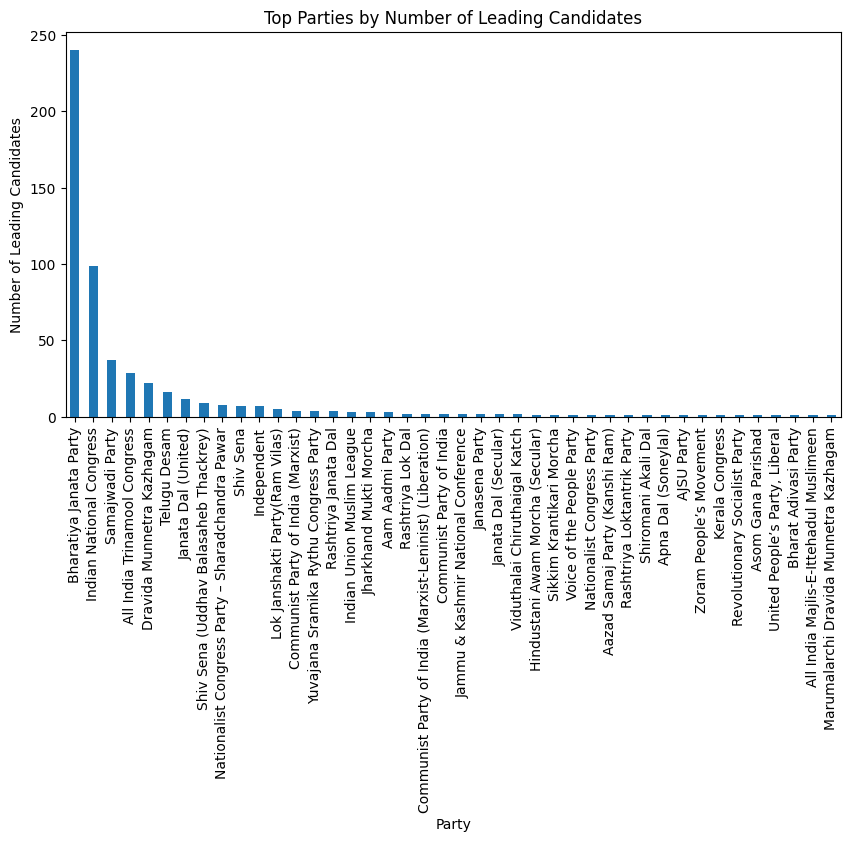

In [37]:
plt.figure(figsize=(10, 5))
leading_party_counts.plot(kind='bar')
plt.title('Top Parties by Number of Leading Candidates')
plt.xlabel('Party')
plt.ylabel('Number of Leading Candidates')
plt.show()


**Number of Trailing Candidates**

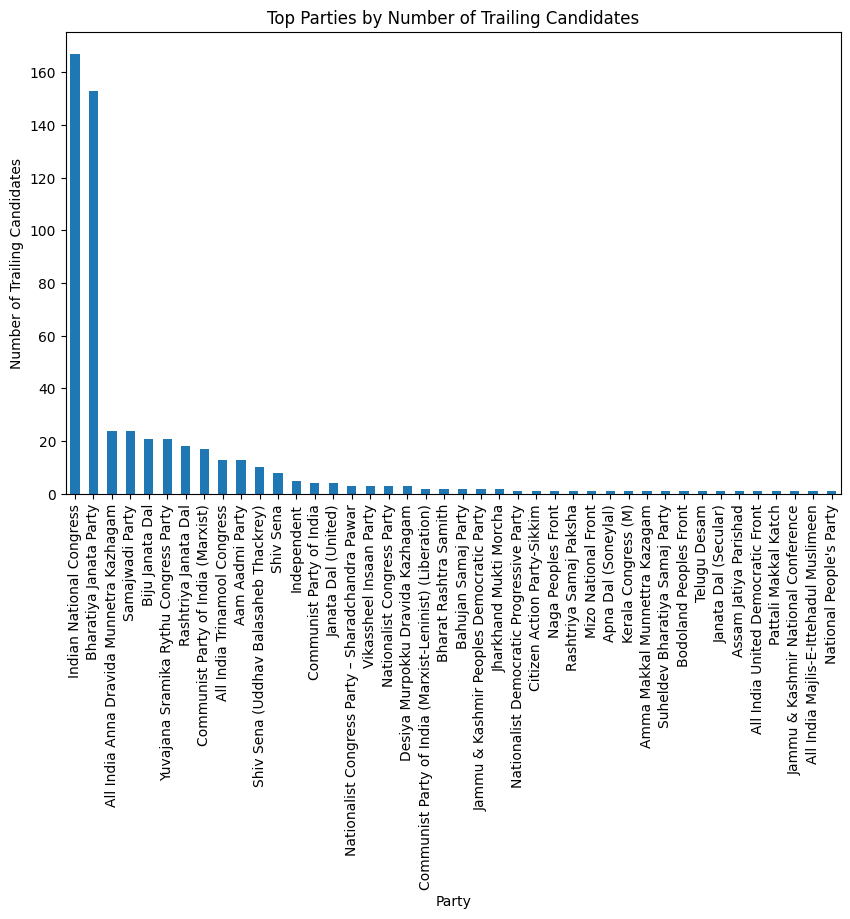

In [38]:
plt.figure(figsize=(10, 6))
trailing_party_counts.plot(kind='bar')
plt.title('Top Parties by Number of Trailing Candidates')
plt.xlabel('Party')
plt.ylabel('Number of Trailing Candidates')
plt.show()


In [39]:
leading_candidates_by_constituency = df.groupby('Constituency')['Leading Candidate'].count()
print(leading_candidates_by_constituency)


Constituency
AJMER               1
ALWAR               1
AMBALA              1
ANANTNAG-RAJOURI    1
ARAKKONAM           1
                   ..
Wardha              1
Wayanad             1
West Delhi          1
Yavatmal- Washim    1
Zahirabad           1
Name: Leading Candidate, Length: 541, dtype: int64


In [40]:
trailing_candidates_by_constituency = df.groupby('Constituency')['Trailing Candidate'].count()
print(trailing_candidates_by_constituency)


Constituency
AJMER               1
ALWAR               1
AMBALA              1
ANANTNAG-RAJOURI    1
ARAKKONAM           1
                   ..
Wardha              1
Wayanad             1
West Delhi          1
Yavatmal- Washim    1
Zahirabad           1
Name: Trailing Candidate, Length: 541, dtype: int64


**Heatmap of Margin of Victory**

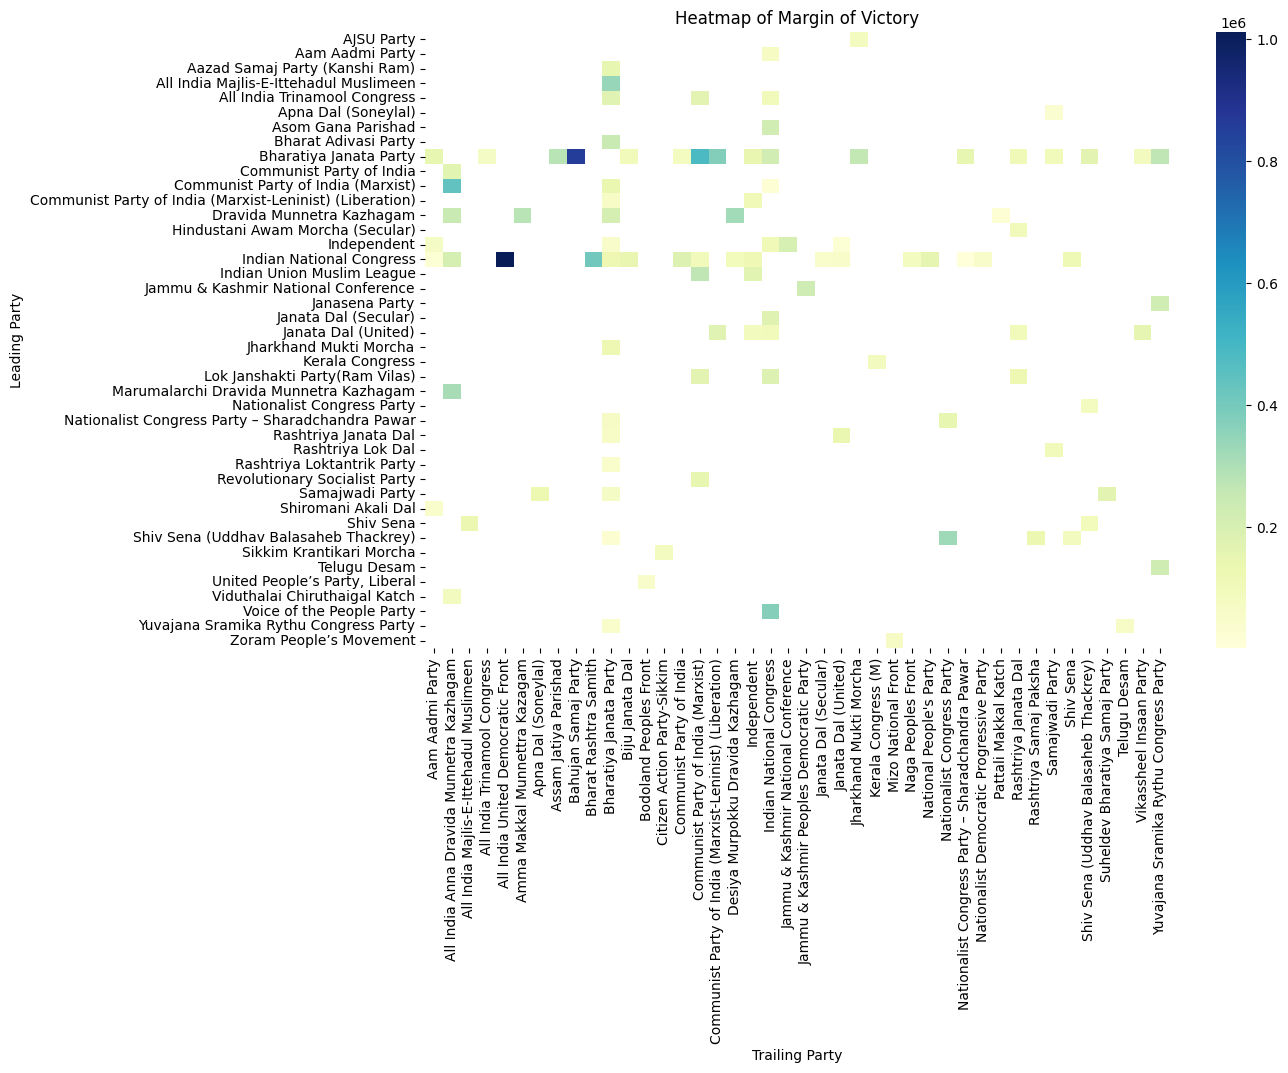

In [45]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.pivot_table(index='Leading Party', columns='Trailing Party', values='Margin'), cmap='YlGnBu')
plt.title('Heatmap of Margin of Victory')
plt.show()


**Highest and lowest 10 margin**

In [46]:
top_10_candidates = df.nlargest(10, 'Margin')[['Leading Candidate', 'Margin']]
print(top_10_candidates)


         Leading Candidate     Margin
221        SHANKAR LALWANI  1175092.0
157        RAKIBUL HUSSAIN  1012476.0
525  SHIVRAJ SINGH CHOUHAN   821408.0
384              C R PATIL   773551.0
186              AMIT SHAH   744716.0
159      ABHISHEK BANERJEE   710930.0
513       BIPLAB KUMAR DEB   611578.0
529       DR. HEMANG JOSHI   582126.0
422      BRIJMOHAN AGRAWAL   575285.0
503      Sasikanth Senthil   572155.0


<ipython-input-99-6ba52ff34db1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Margin', y='Constituency', data=top_10_constituencies, palette='viridis')


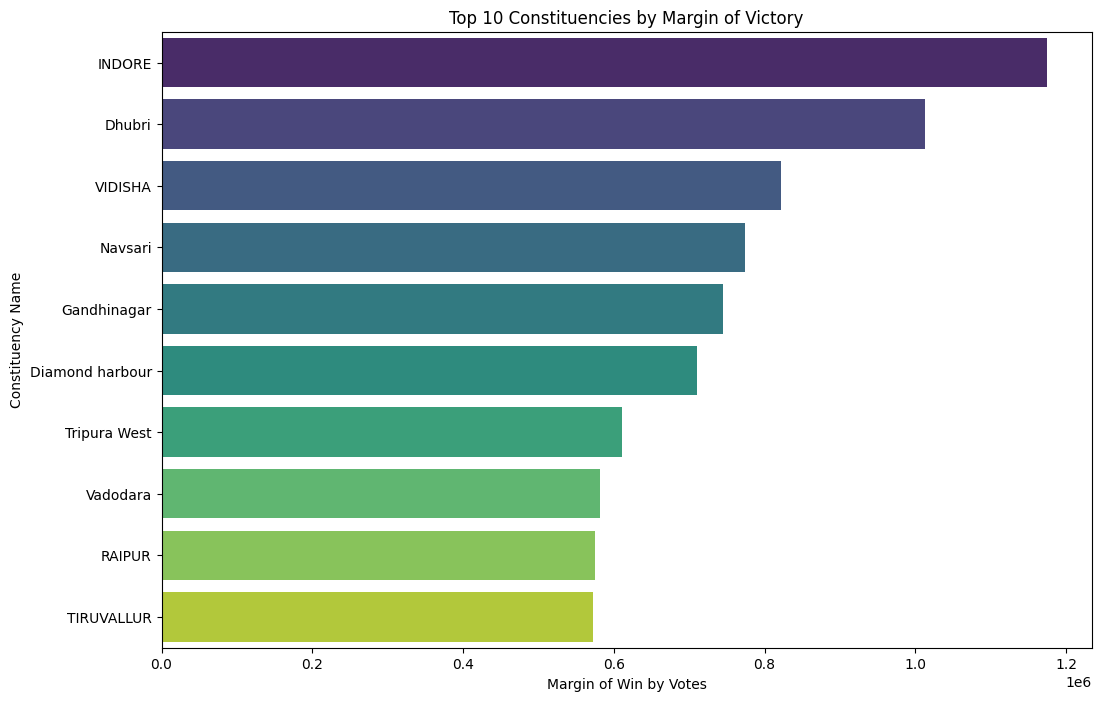

In [99]:
top_10_constituencies = df.nlargest(10, 'Margin')

# Plot Bar Chart
plt.figure(figsize=(12, 8))
sns.barplot(x='Margin', y='Constituency', data=top_10_constituencies, palette='viridis')
plt.title('Top 10 Constituencies by Margin of Victory')
plt.xlabel('Margin of Win by Votes')
plt.ylabel('Constituency Name')
plt.show()


In [47]:
bottom_10_candidates = df.nsmallest(10, 'Margin')[['Leading Candidate', 'Margin']]
print(bottom_10_candidates)


             Leading Candidate  Margin
357   RAVINDRA DATTARAM WAIKAR    48.0
40           ADV ADOOR PRAKASH   684.0
236    RABINDRA NARAYAN BEHERA  1587.0
226         RAO RAJENDRA SINGH  1615.0
256                BHOJRAJ NAG  1884.0
125              MANISH TEWARI  2504.0
207        AJENDRA SINGH LODHI  2629.0
312  MUHAMMED HAMDULLAH SAYEED  2647.0
175              MUKESH RAJPUT  2678.0
74              KAMLESH PASWAN  3150.0


**Distribution of Leading and Trailing Candidates by Party**

<ipython-input-100-a18bbd149000>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Margin', y='Constituency', data=bottom_10_constituencies, palette='magma')


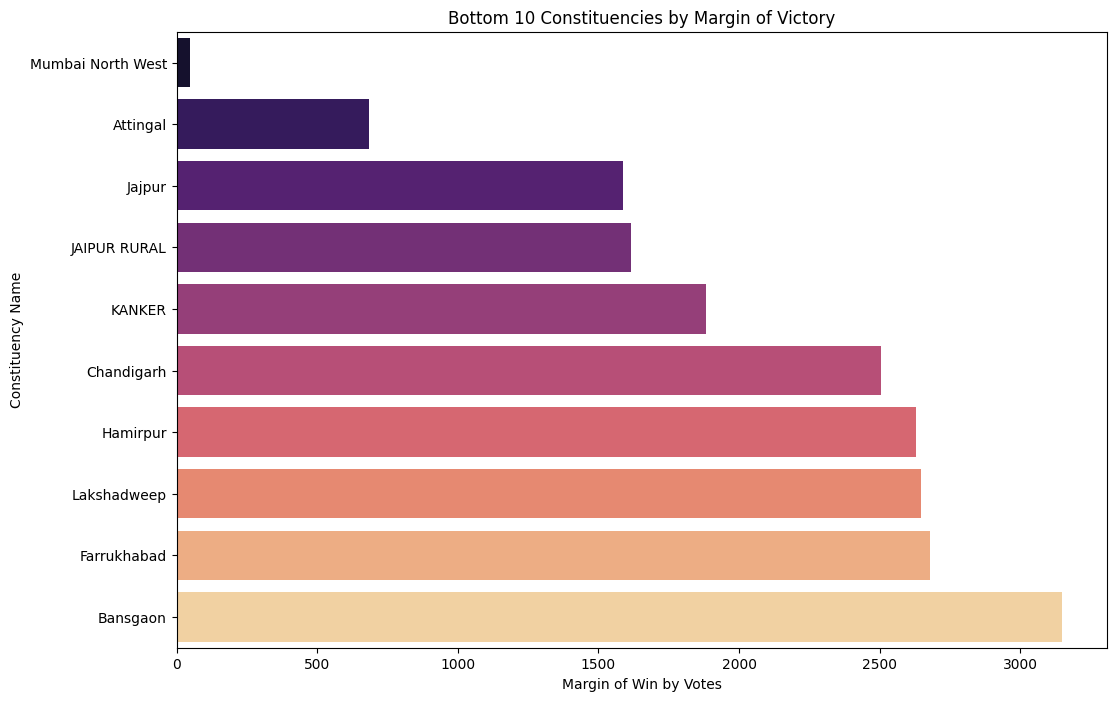

In [100]:
bottom_10_constituencies = df.nsmallest(10, 'Margin')

# Plot Bar Chart
plt.figure(figsize=(12, 8))
sns.barplot(x='Margin', y='Constituency', data=bottom_10_constituencies, palette='magma')
plt.title('Bottom 10 Constituencies by Margin of Victory')
plt.xlabel('Margin of Win by Votes')
plt.ylabel('Constituency Name')
plt.show()


<Figure size 25000x10000 with 0 Axes>

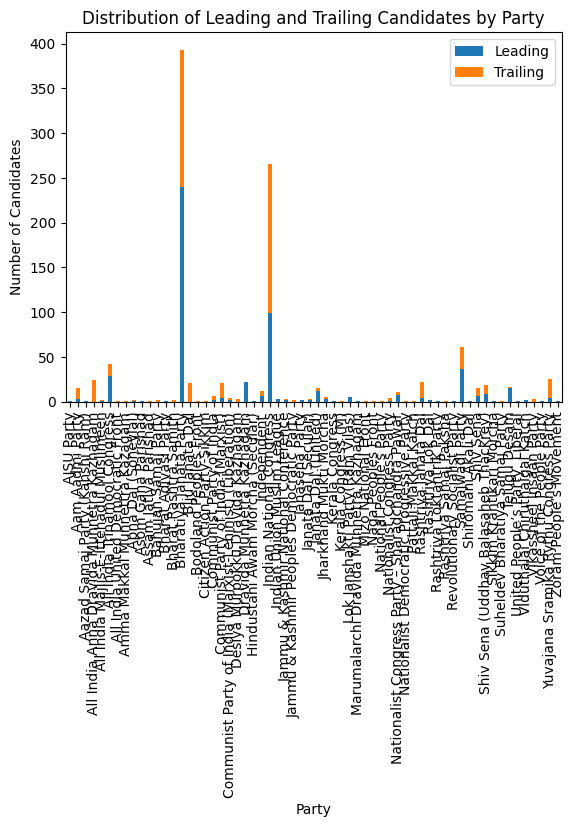

In [135]:
plt.figure(figsize=(250, 100))
leading_trailing_counts = pd.DataFrame({'Leading': df['Leading Party'].value_counts(),'Trailing': df['Trailing Party'].value_counts()})
leading_trailing_counts.plot(kind='bar', stacked=True)
plt.title('Distribution of Leading and Trailing Candidates by Party')
plt.xlabel('Party')
plt.ylabel('Number of Candidates')
plt.show()


**Count of Declared and Undeclared Results by Leading Candidate Party**

<Figure size 1200x600 with 0 Axes>

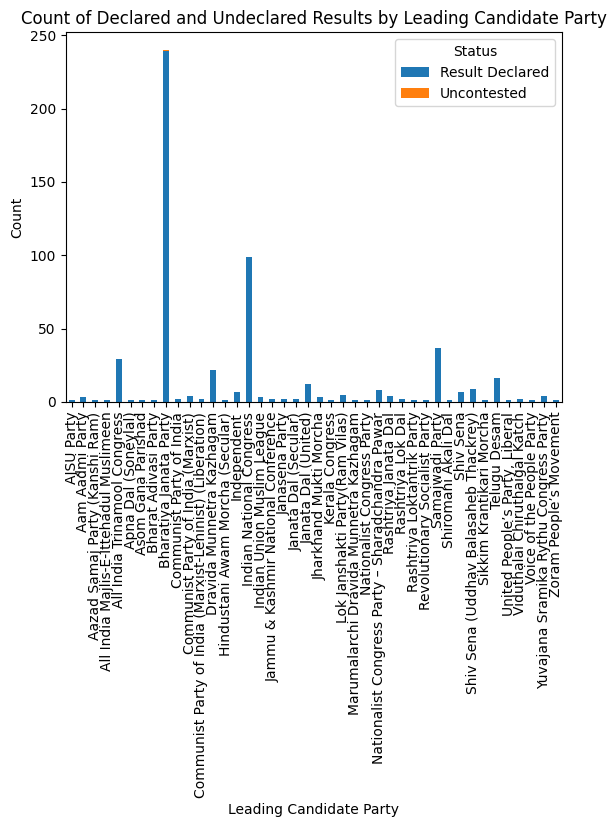

In [60]:
plt.figure(figsize=(12, 6))
results_declared_party = df.groupby(['Leading Party', 'Status']).size().unstack().fillna(0)
results_declared_party.plot(kind='bar', stacked=True)
plt.title('Count of Declared and Undeclared Results by Leading Candidate Party')
plt.xlabel('Leading Candidate Party')
plt.ylabel('Count')
plt.show()



**Number of Leading Candidates by State**

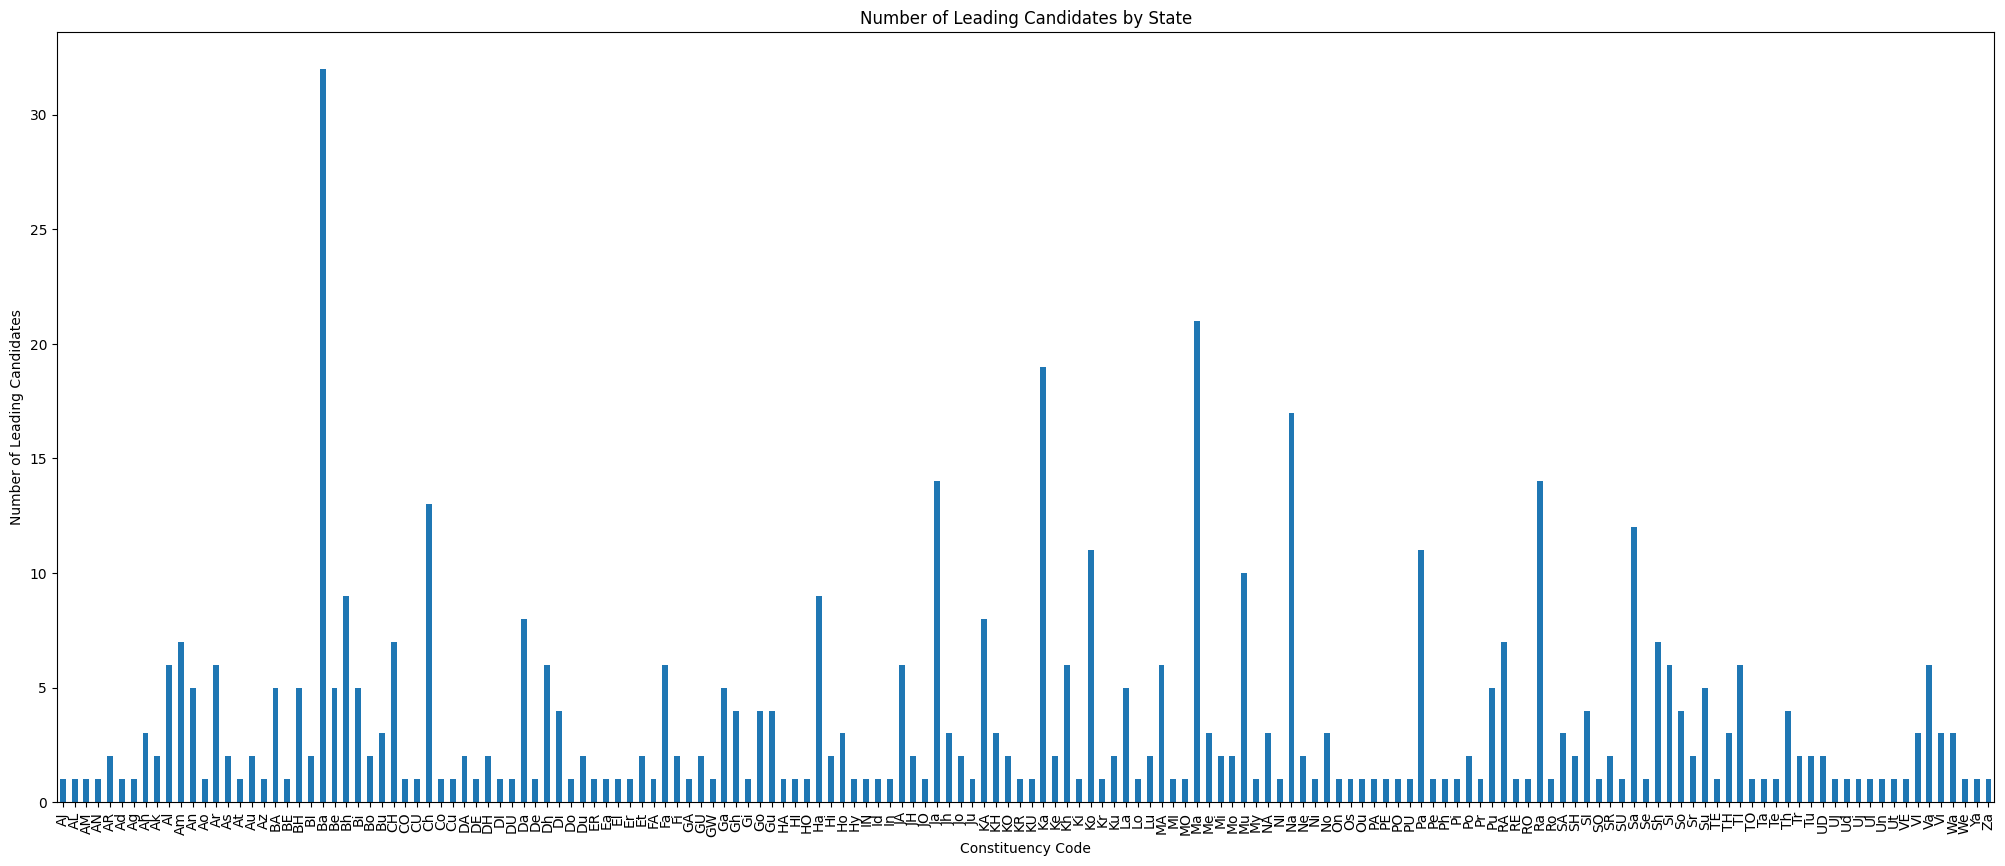

In [89]:
plt.figure(figsize=(25, 10))
leading_candidates_state = df['Leading Candidate'].groupby(df['Constituency'].astype(str).str[:2]).count()
leading_candidates_state.plot(kind='bar')
plt.title('Number of Leading Candidates by State')
plt.xlabel('Constituency Code')
plt.ylabel('Number of Leading Candidates')
plt.xticks(rotation=90)
plt.show()



**Violin Plot of Margin of Victory by Declared Results**

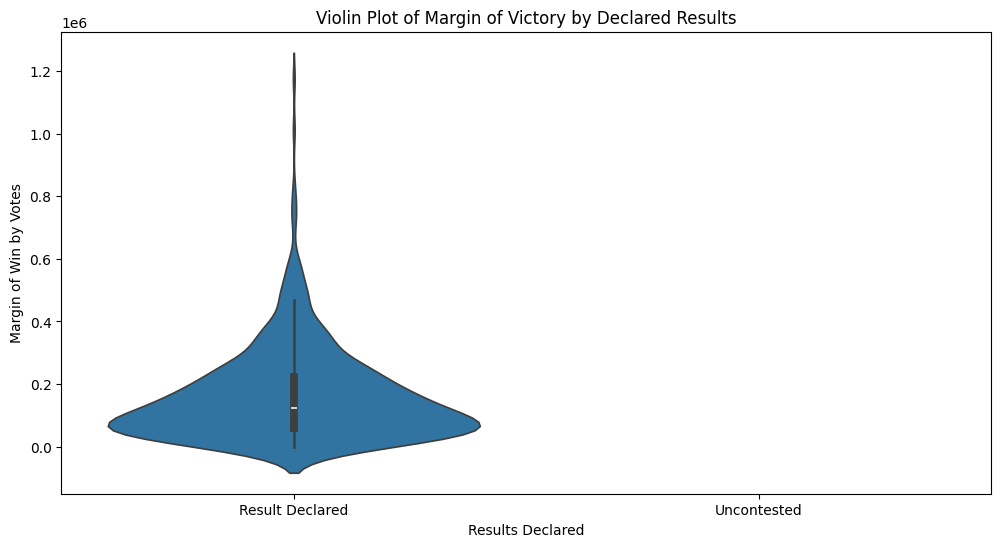

In [69]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Status', y='Margin', data=df)
plt.title('Violin Plot of Margin of Victory by Declared Results')
plt.xlabel('Results Declared')
plt.ylabel('Margin of Win by Votes')
plt.show()


**Margin of Victory vs. Constituency**

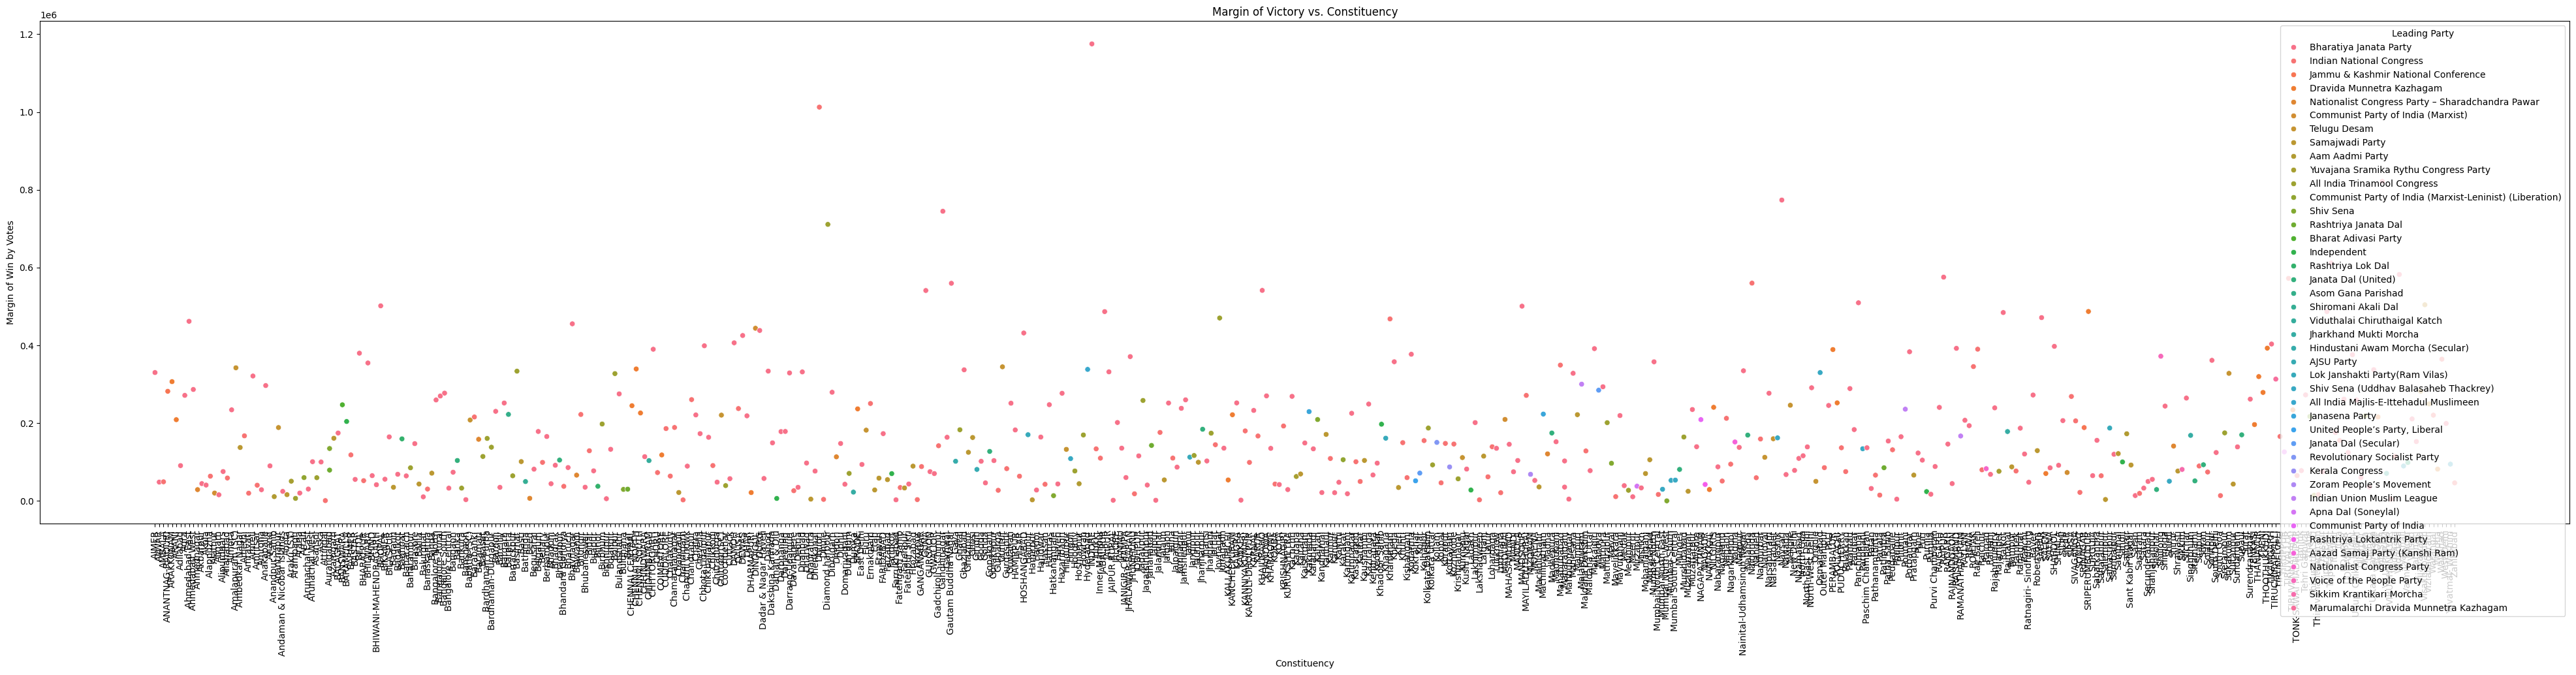

In [108]:
# Margin of Victory vs. Constituency Number
plt.figure(figsize=(50, 10))
sns.scatterplot(x='Constituency', y='Margin', hue='Leading Party', data=df)
plt.title('Margin of Victory vs. Constituency')
plt.xlabel('Constituency')
plt.ylabel('Margin of Win by Votes')
plt.xticks(rotation=90)
plt.show()


**Party wise win percentage**

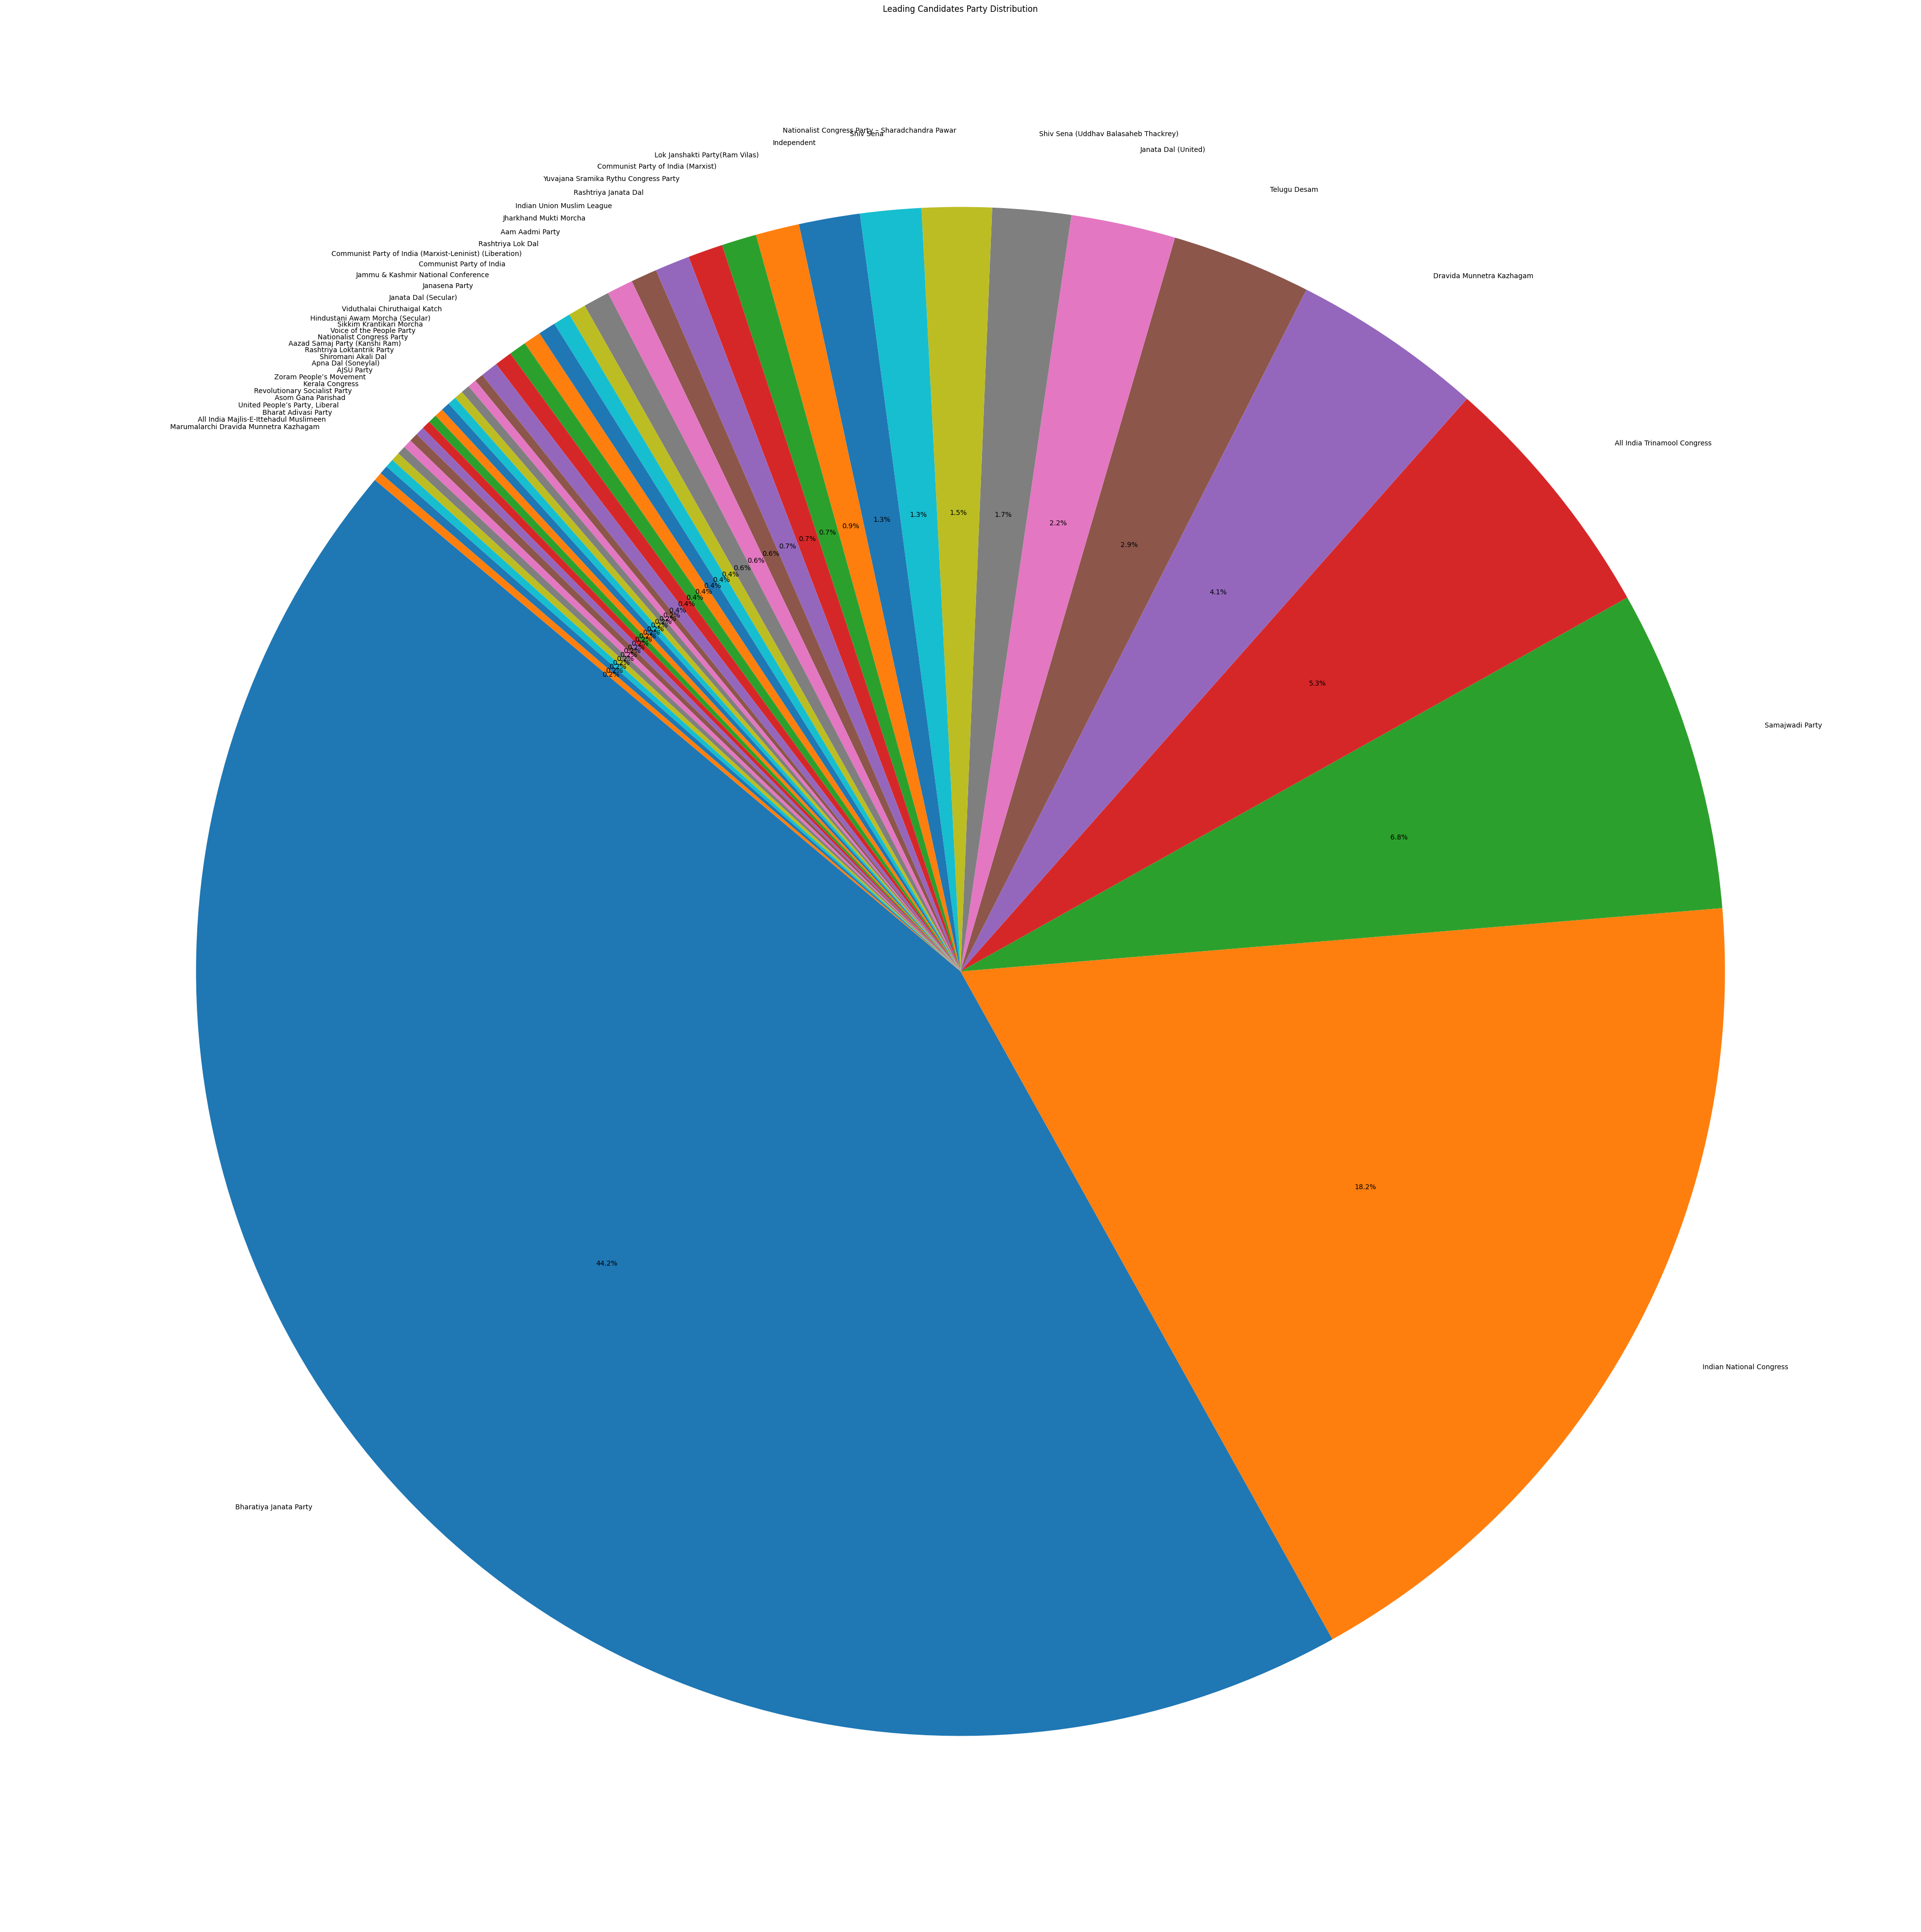

In [143]:
# Leading Candidates Party Distribution
leading_party_counts = df['Leading Party'].value_counts()

# Plot Pie Chart
plt.figure(figsize=(50, 150))
leading_party_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Leading Candidates Party Distribution')
plt.ylabel('')
plt.show()


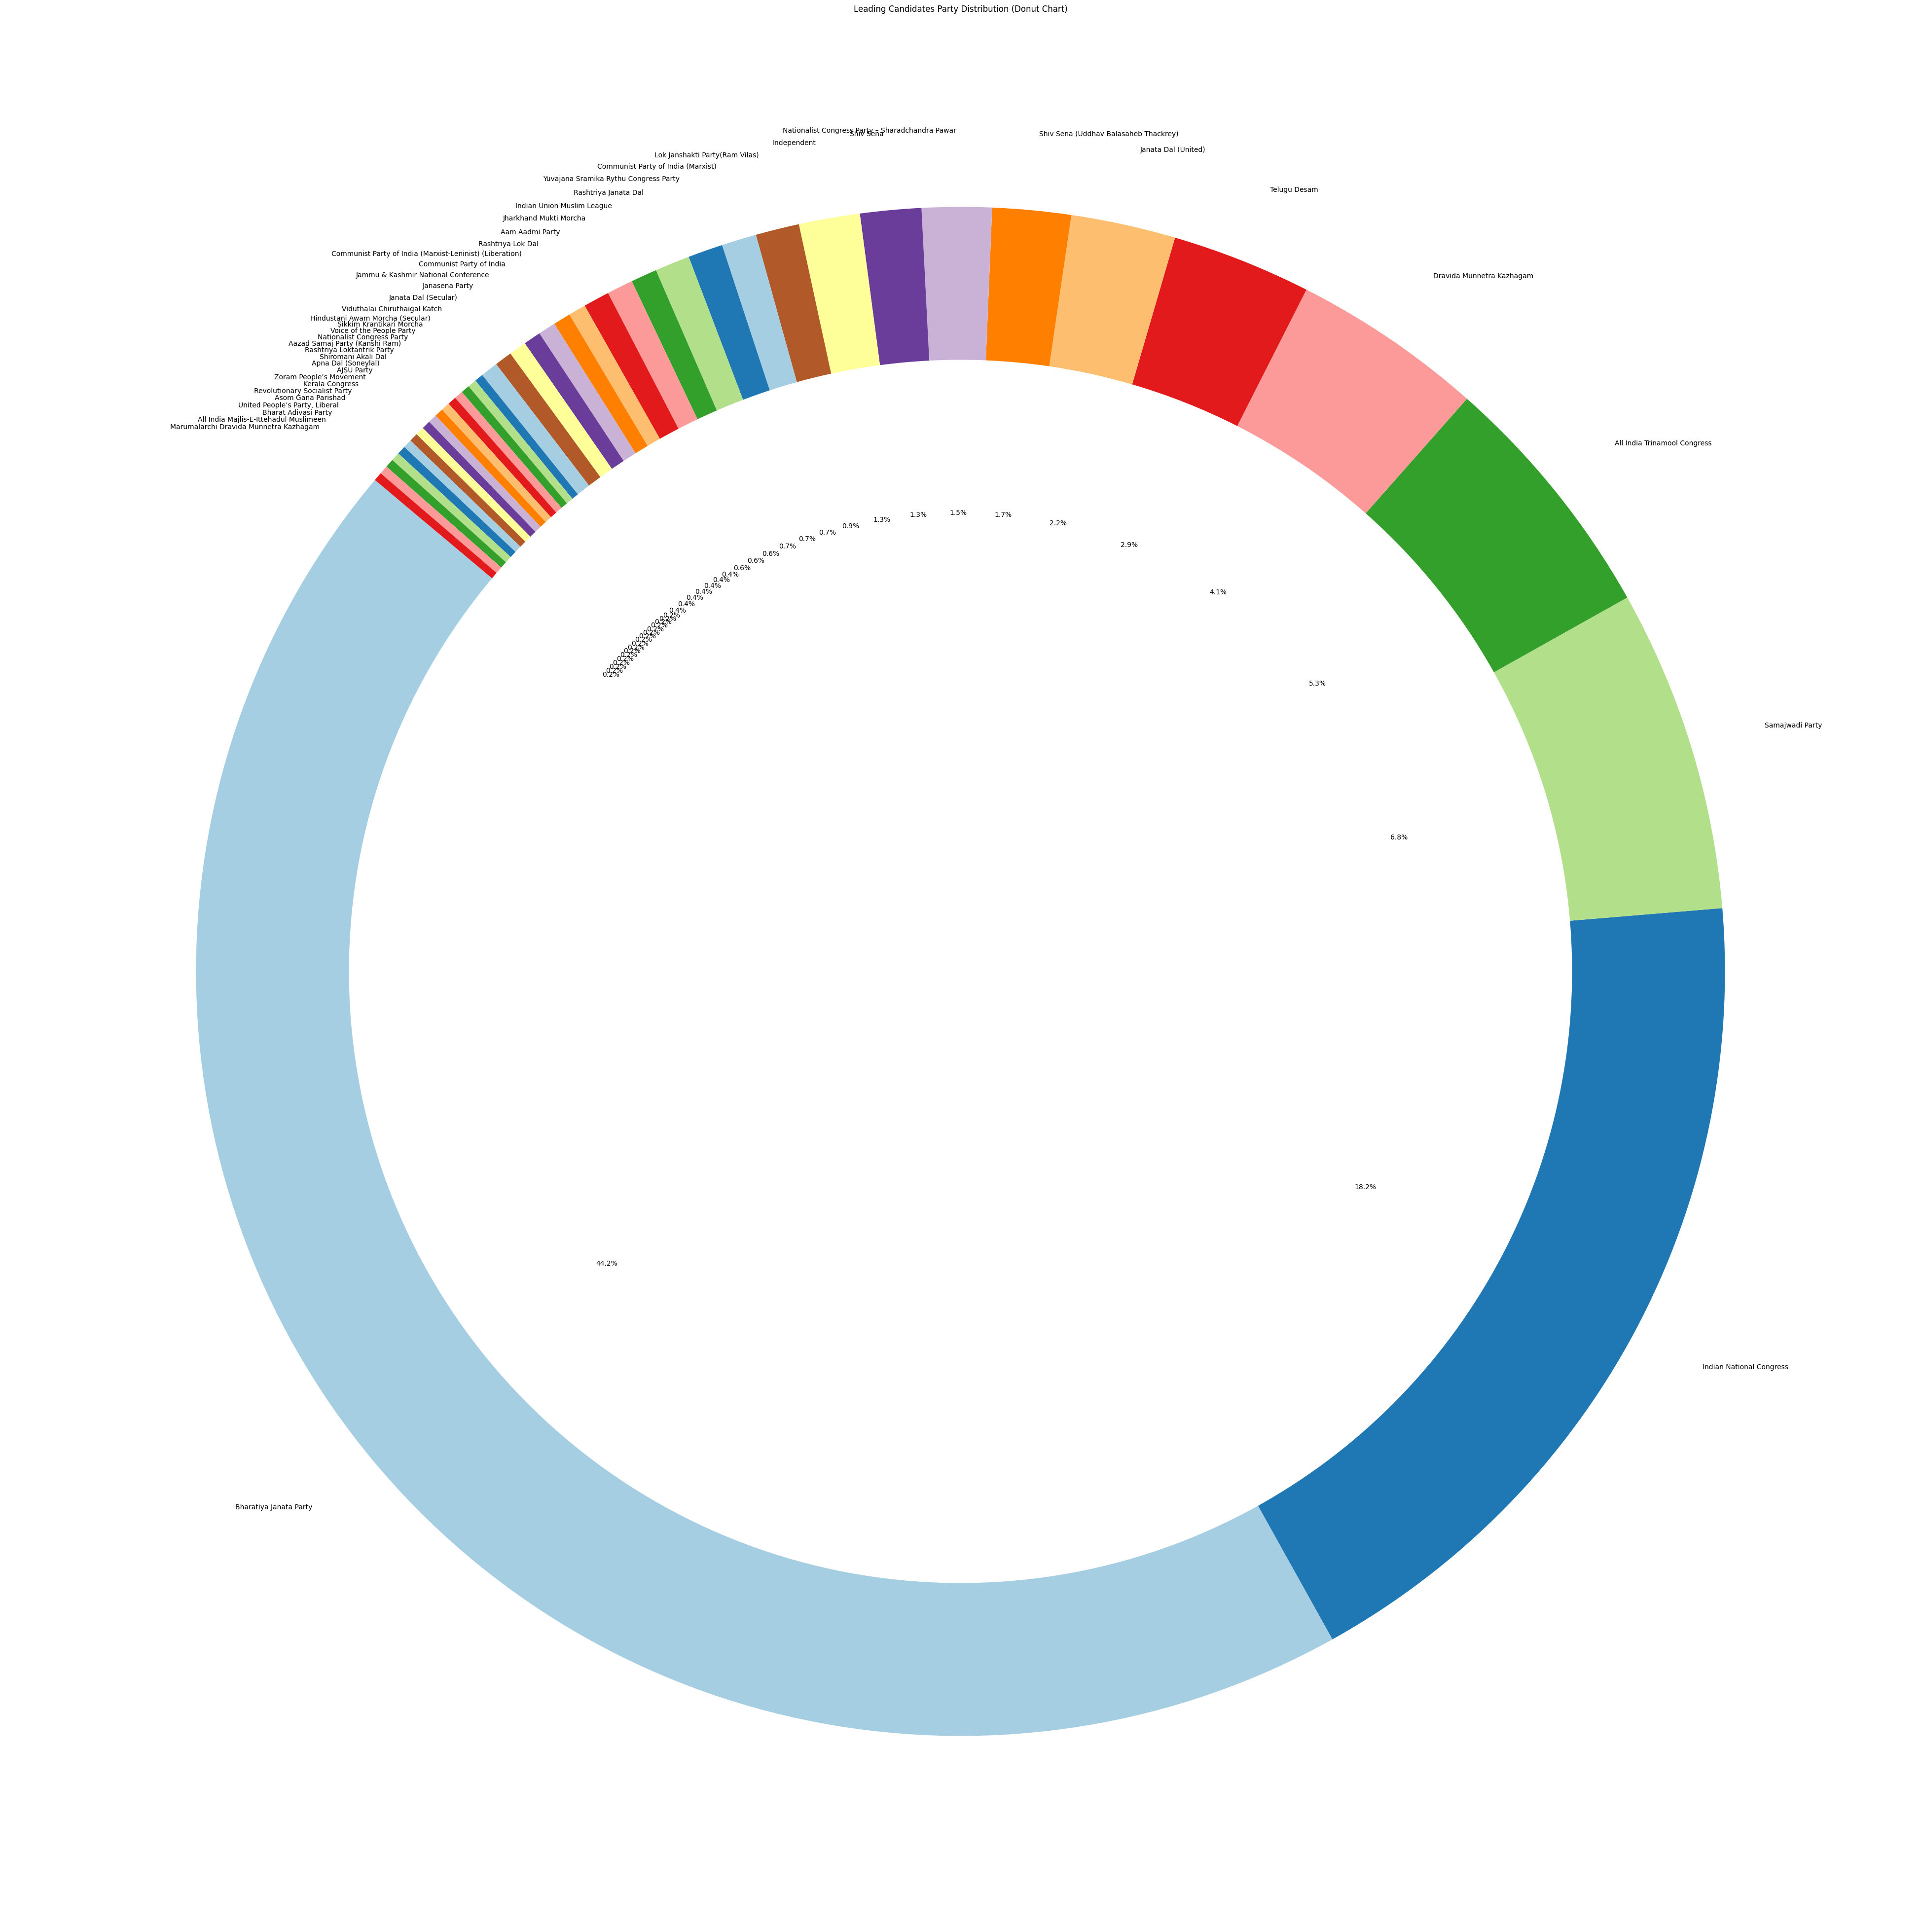

In [137]:
# Ring Chart (Donut Chart) for Leading Candidates Party
plt.figure(figsize=(50, 200))
leading_party_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Paired'), wedgeprops=dict(width=0.2))
plt.title('Leading Candidates Party Distribution (Donut Chart)')
plt.ylabel('')
plt.show()


**Top 10 Leading Candidates by Margin of Victory**

<ipython-input-102-fc0e76c8408f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Margin', y='Leading Candidate', data=top_10_leading_candidates, palette='cubehelix')


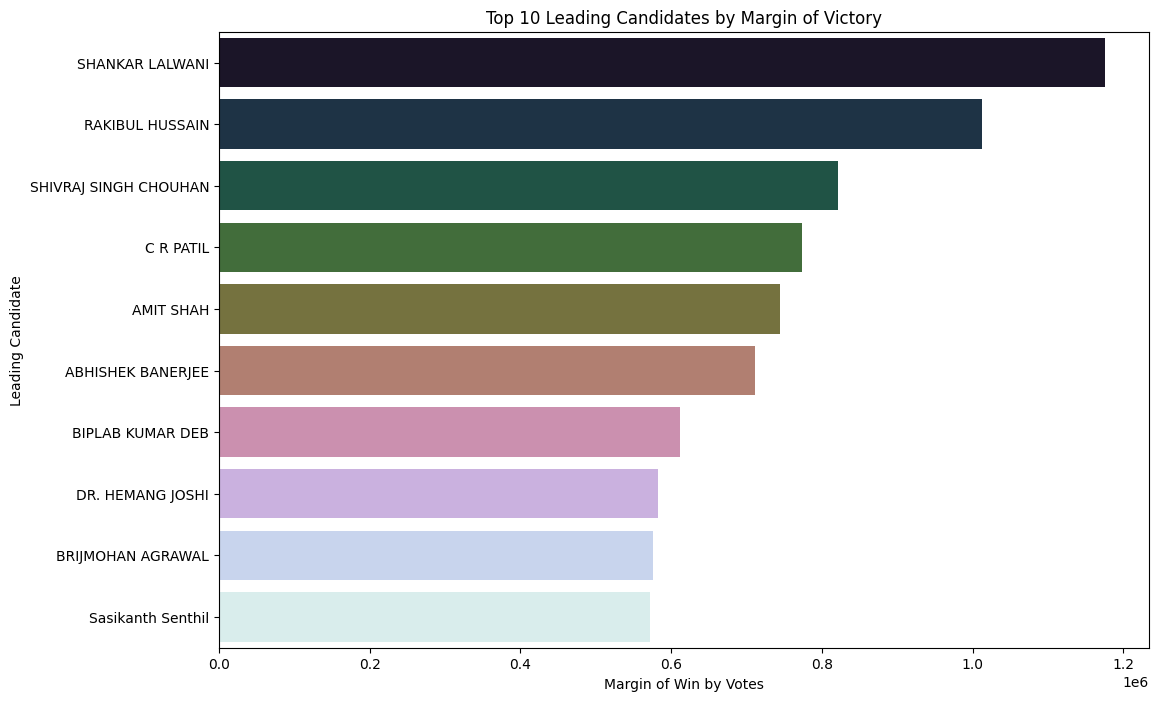

In [102]:
top_10_leading_candidates = df.nlargest(10, 'Margin')

# Plot Bar Chart
plt.figure(figsize=(12, 8))
sns.barplot(x='Margin', y='Leading Candidate', data=top_10_leading_candidates, palette='cubehelix')
plt.title('Top 10 Leading Candidates by Margin of Victory')
plt.xlabel('Margin of Win by Votes')
plt.ylabel('Leading Candidate')
plt.show()


**Distribution of Margins by Leading Candidate Party**

<ipython-input-121-70a86715a614>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Leading Party', y='Margin', data=df, palette='Set1')


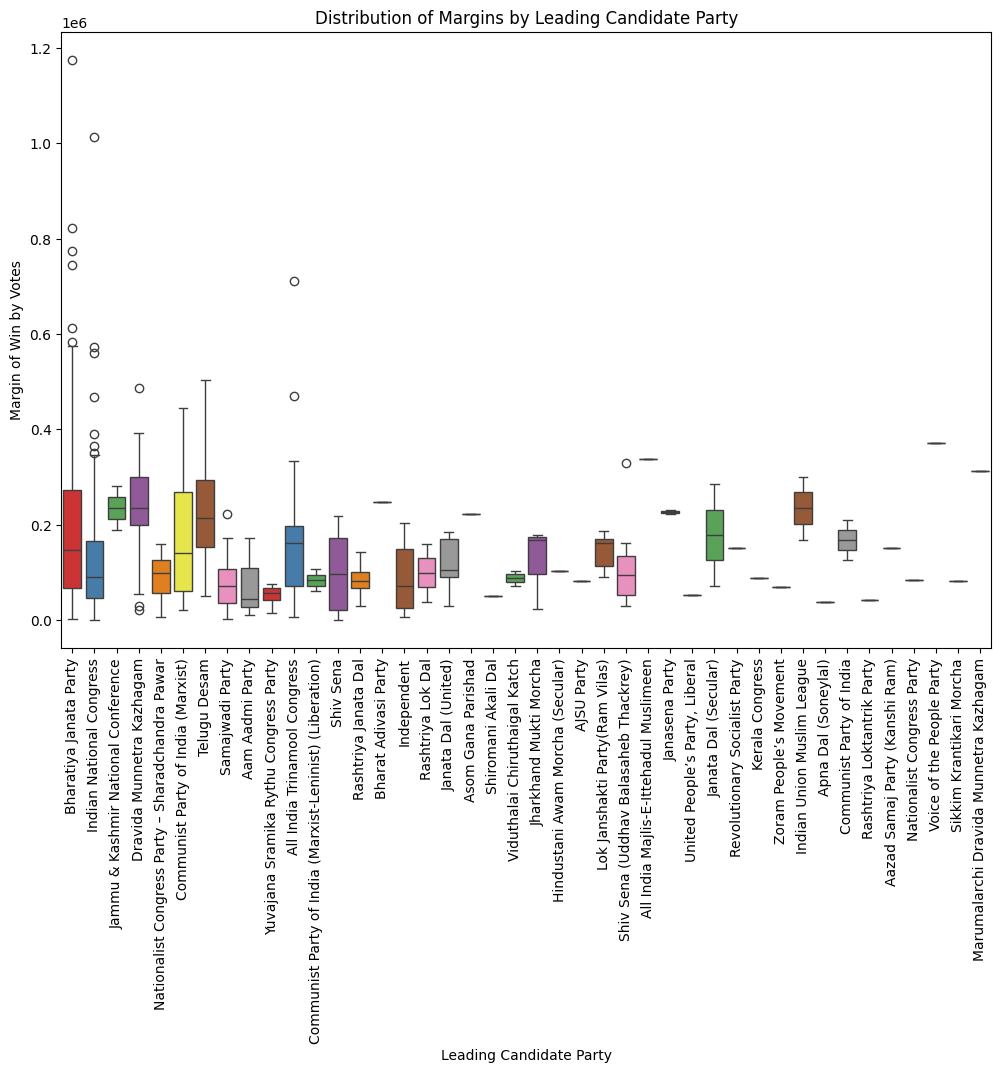

In [121]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Leading Party', y='Margin', data=df, palette='Set1')
plt.title('Distribution of Margins by Leading Candidate Party')
plt.xlabel('Leading Candidate Party')
plt.ylabel('Margin of Win by Votes')
plt.xticks(rotation=90)
plt.show()


**Top 50 Constituencies by Margin of Victory**

<ipython-input-132-6acbb9696035>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Margin', y='Constituency', data=top_50_constituencies, palette='viridis')


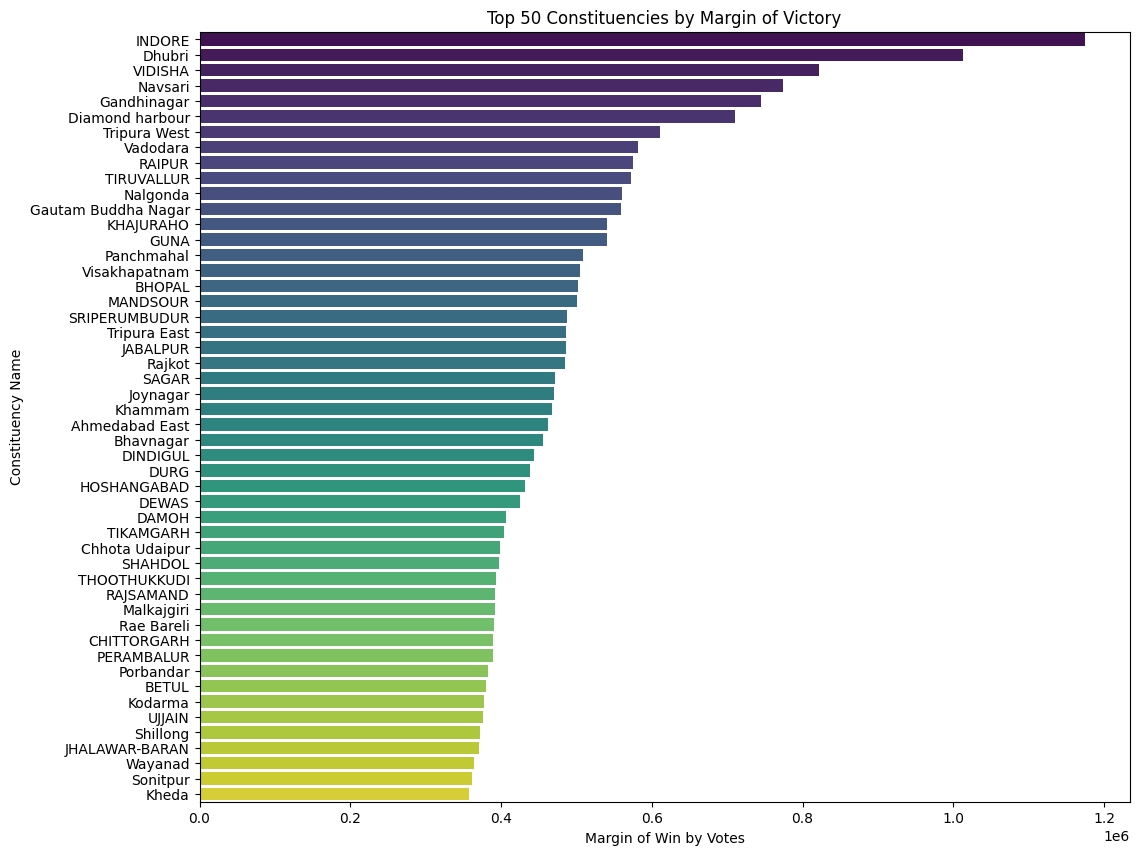

In [132]:
top_50_constituencies = df.nlargest(50, 'Margin')

# Plot Bar Chart
plt.figure(figsize=(12, 10))
sns.barplot(x='Margin', y='Constituency', data=top_50_constituencies, palette='viridis')
plt.title('Top 50 Constituencies by Margin of Victory')
plt.xlabel('Margin of Win by Votes')
plt.ylabel('Constituency Name')
plt.show()

**All 543 Constituencies by Margin of Victory**

<ipython-input-139-6c10357c9925>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Margin', y='Constituency', data=top_543_constituencies, palette='viridis')


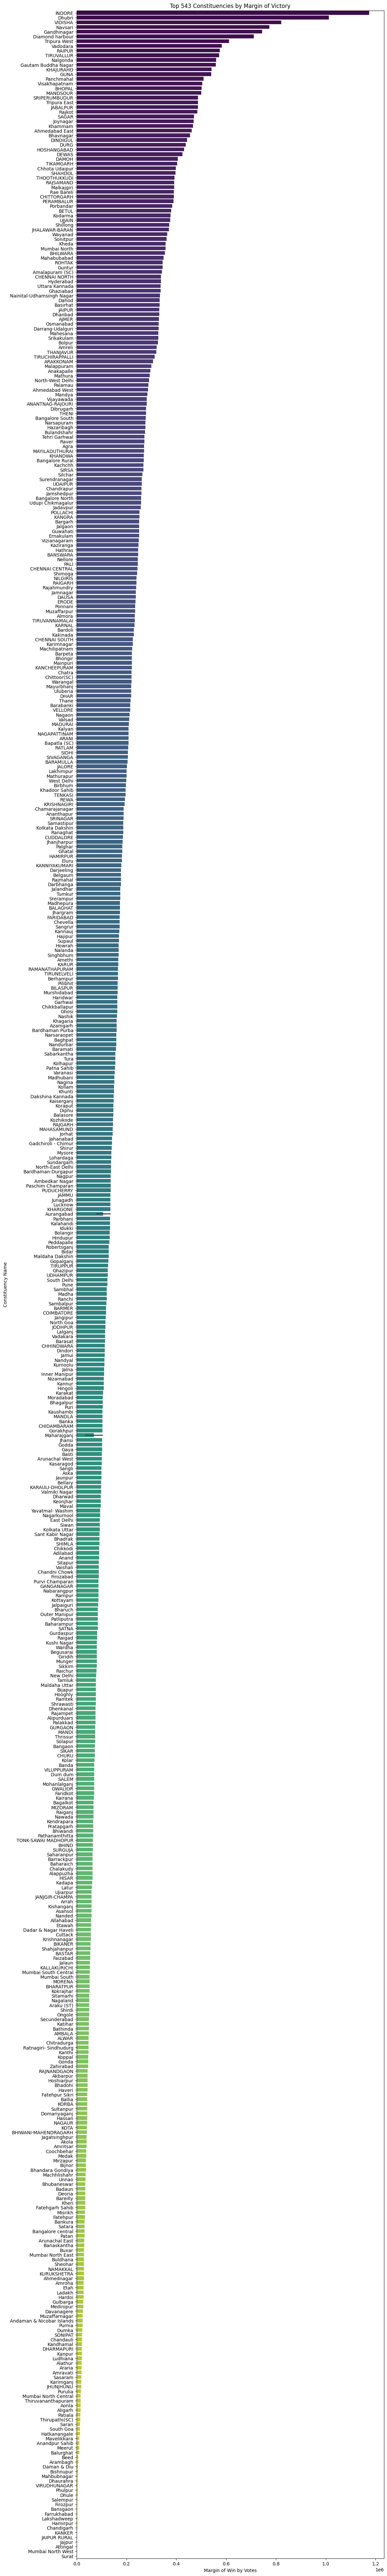

In [139]:
top_543_constituencies = df.nlargest(543, 'Margin')

# Plot Bar Chart
plt.figure(figsize=(12, 100))
sns.barplot(x='Margin', y='Constituency', data=top_543_constituencies, palette='viridis')
plt.title('All 543 Constituencies by Margin of Victory')
plt.xlabel('Margin of Win by Votes')
plt.ylabel('Constituency Name')
plt.show()

**Leading Candidate Party Performance in Top 50 Constituencies**

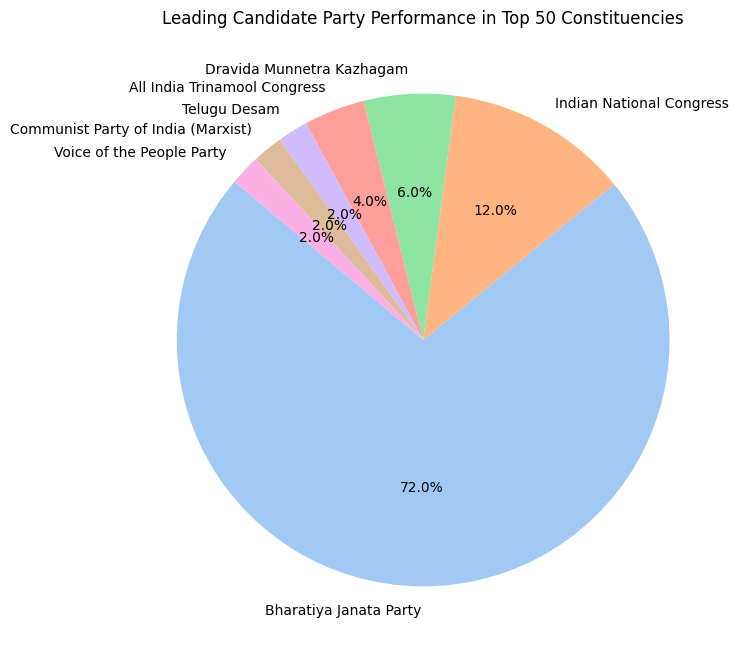

In [133]:
# Filter the data for the top 10 constituencies
leading_party_top_50 = top_50_constituencies['Leading Party'].value_counts()

# Plot Pie Chart
plt.figure(figsize=(10, 8))
leading_party_top_50.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Leading Candidate Party Performance in Top 50 Constituencies')
plt.ylabel('')
plt.show()


Thanks for reading see you soon:🙋‍♂️🙋‍♂️